# Initial setup: Breast cancer winsconsin

In [6]:
pip install --upgrade jupyter ipywidgets

     -------------------------------------- 139.8/139.8 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 14.3/14.3 MB 5.9 MB/s eta 0:00:00
     -------------------------------------- 258.5/258.5 kB 8.0 MB/s eta 0:00:00
     ---------------------------------------- 12.3/12.3 MB 6.2 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 6.4 MB/s eta 0:00:00
     -------------------------------------- 216.6/216.6 kB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 73.5/73.5 kB 1.3 MB/s eta 0:00:00
     -------------------------------------- 134.9/134.9 kB 7.8 MB/s eta 0:00:00
     ---------------------------------------- 69.1/69.1 kB 3.7 MB/s eta 0:00:00
     -------------------------------------- 386.9/386.9 kB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 59.7/59.7 kB ? eta 0:00:00
     -------------------------------------- 187.3/187.3 kB 5.7 MB/s eta 0:00:00
     -------------------------------------- 163.4


[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score 
import sklearn.linear_model as skl_lm
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import optuna
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall, AUC

In [15]:
#Import the dataset
df = pd.read_csv("data.csv")

In [16]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [17]:
df.info

<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

In [18]:
#encode the values of diagnosis B and M to 0 and 1
df["diagnosis_enc"] = df["diagnosis"].map({'B': 0, 'M': 1})
df["diagnosis_enc"].value_counts()

diagnosis_enc
0    357
1    212
Name: count, dtype: int64

In [19]:
# dropping the columns that are not needed
df = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)

In [20]:
# defining the X Axis and Y Axis (dependent and non-dependent)

X = df.drop('diagnosis_enc', axis=1)
y = df['diagnosis_enc']


# Train test split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
print(f'Training set X: {X_train.shape}\nTraining set y: {X_train.shape}\n')
print(f'Test set X: {X_test.shape}\nTest set y: {X_test.shape}')

Training set X: (455, 30)
Training set y: (455, 30)

Test set X: (114, 30)
Test set y: (114, 30)


# Decision tree

## Full decision tree

In [23]:
# Model definition
model = DecisionTreeClassifier(random_state=42)

# Model training
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [24]:
# Prevision on test set
y_pred = model.predict(X_test)

# Calculation of precisione
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.95


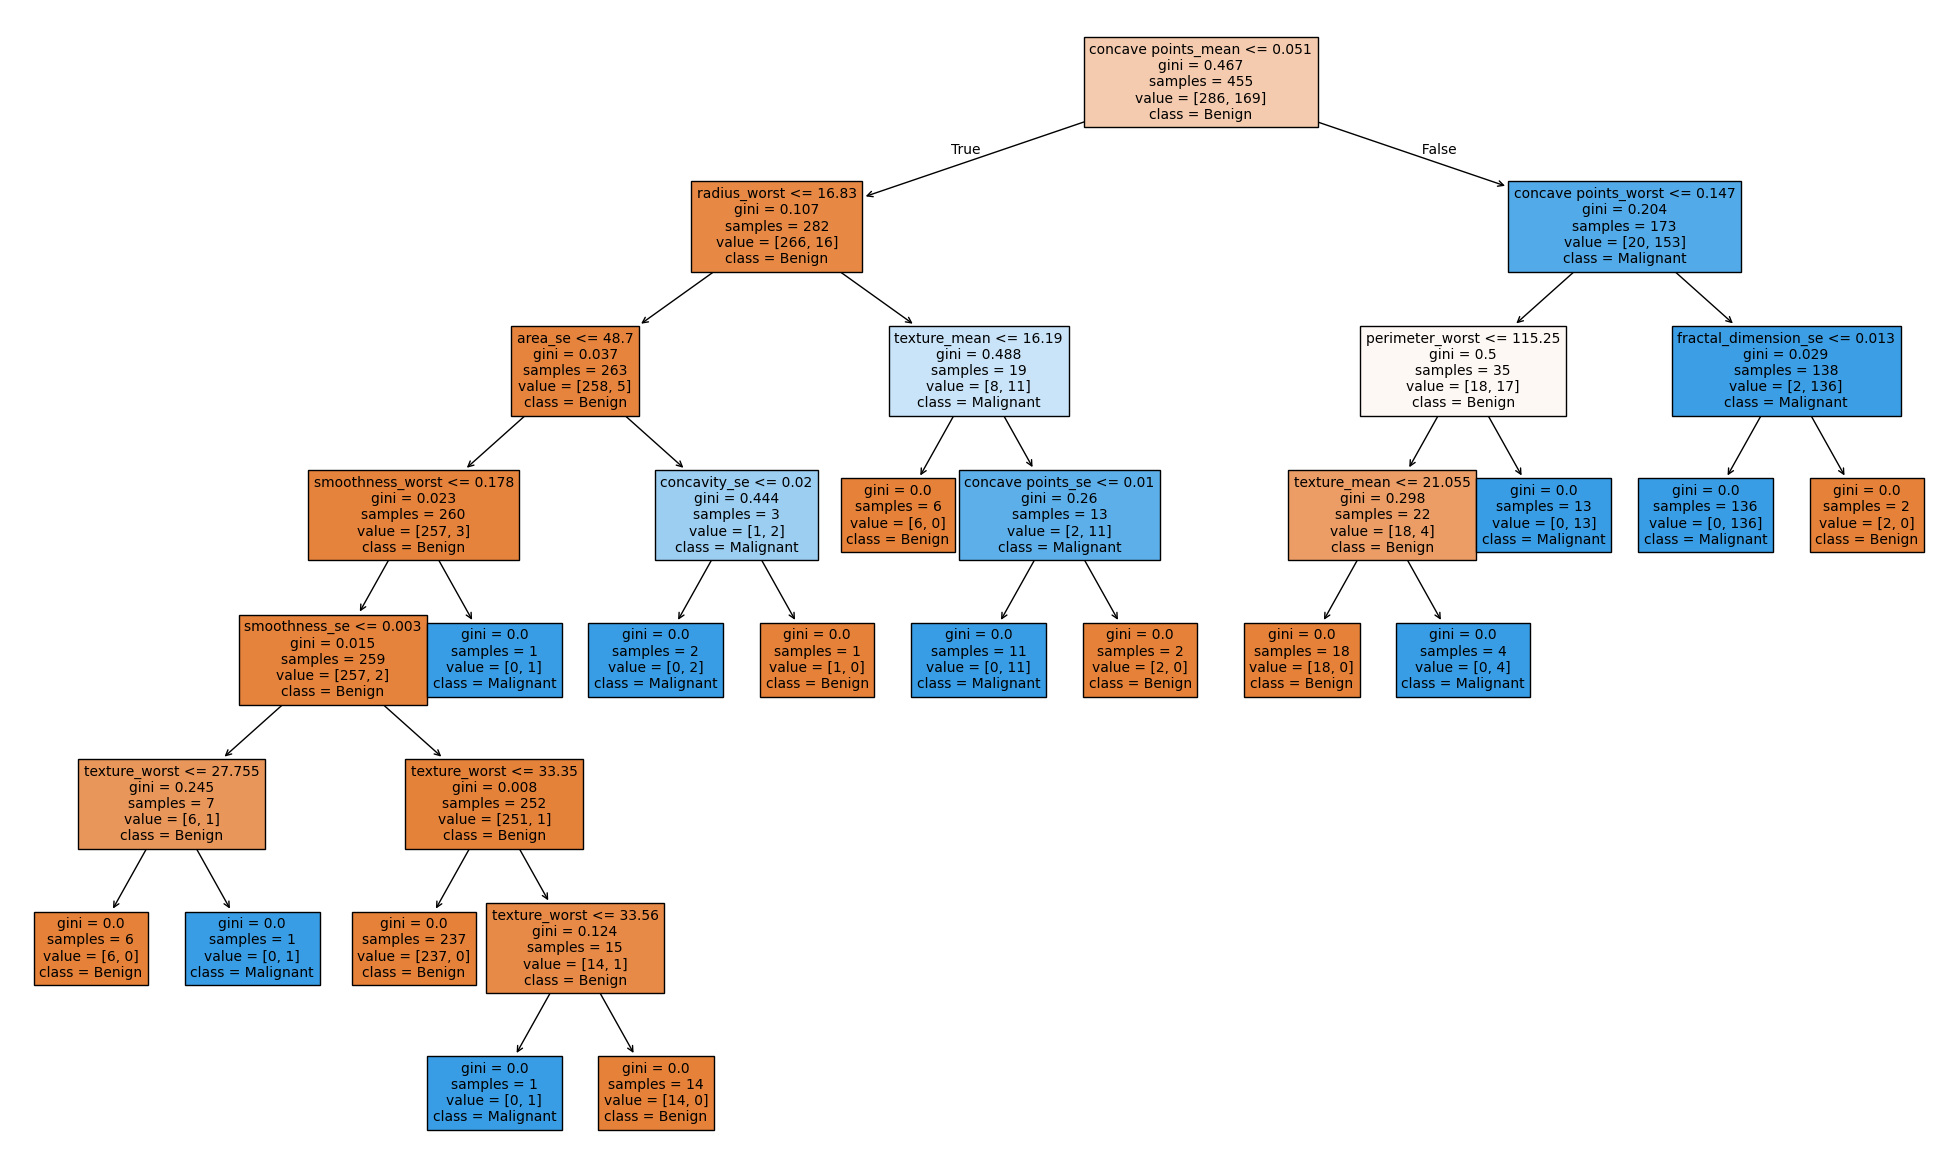

In [25]:
# leaf and node
plt.figure(figsize=(25,15))
plot_tree(model, feature_names=X.columns, class_names=['Benign', 'Malignant'], filled=True, fontsize = 10)
plt.show()

### Decision tree: pre-pruning

In [26]:
# Model creation with pre-pruning
model_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)

# Model training
model_pruned.fit(X_train, y_train)

# Model evaluation
y_pred_pruned = model_pruned.predict(X_test)
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print(f'Accuracy after pruning: {accuracy_pruned:.2f}')

Accuracy after pruning: 0.95


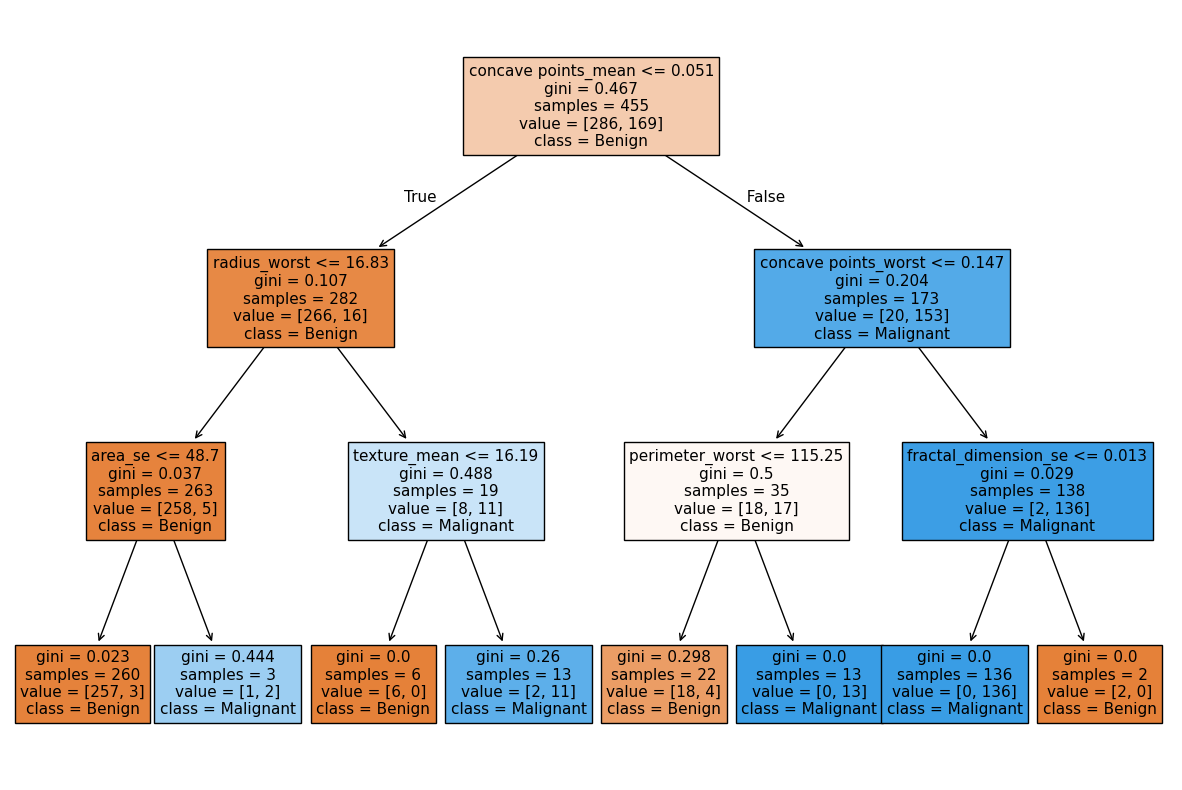

In [27]:
# leaf and nod
plt.figure(figsize=(15,10))
plot_tree(model_pruned, feature_names=X.columns, class_names=['Benign', 'Malignant'], filled=True, fontsize = 11)
plt.show()

C:\Users\pchaudhary.FFIND\AppData\Local\Temp\ipykernel_30524\1525806876.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')


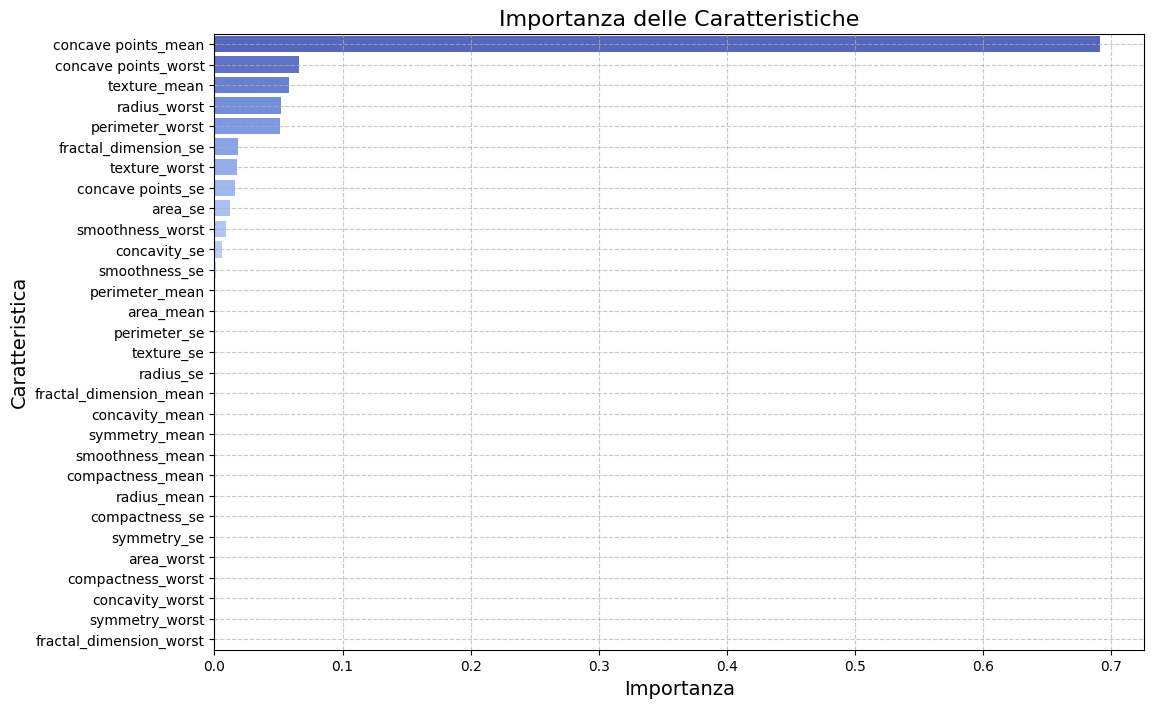

In [28]:
# Feature importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Feature importance plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')
plt.title('Importanza delle Caratteristiche', fontsize=16)
plt.xlabel('Importanza', fontsize=14)
plt.ylabel('Caratteristica', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



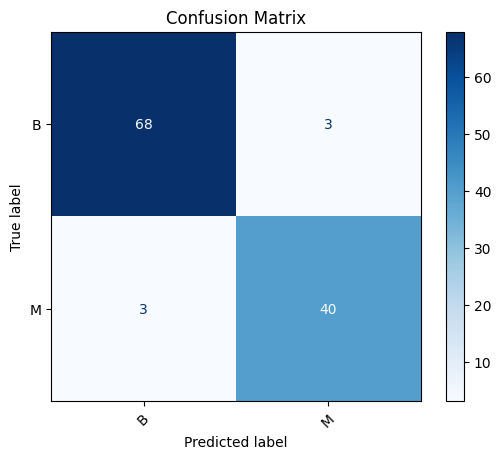

In [29]:
# Supposing we have y_true and y_pred already defined
# y_test = [...]  # Real values  
# y_pred = [...]  # Prediction of the model
# Report of classification
print("Classification Report:")
print(classification_report(y_test, y_pred))
class_names = ['B', 'M']  # Personalizza se necessario
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', values_format='d', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

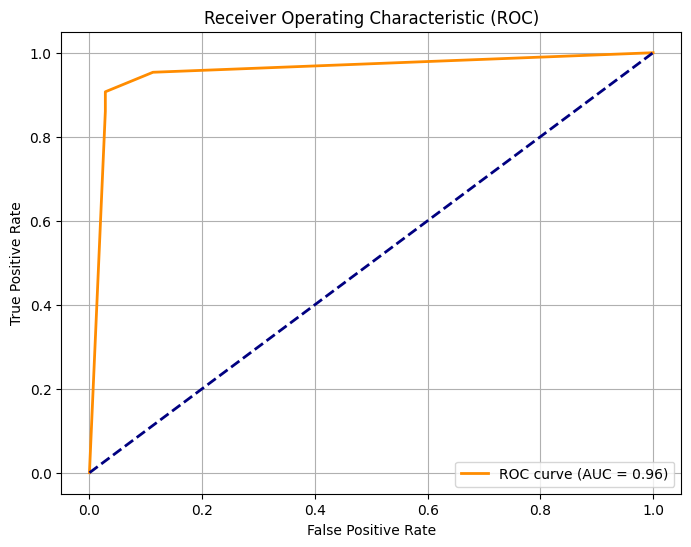

In [30]:
# y_test = [...]  # Real value
# y_proba = [...] # Probability predicted for the postive class (es. model.predict_proba(X)[:, 1])
y_proba = model_pruned.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Decision tree: post-pruning

In [31]:
# Model with post-pruning
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Find the best alpha
model_pruned = None
best_accuracy = 0
for ccp_alpha in ccp_alphas:
    model_temp = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    model_temp.fit(X_train, y_train)
    y_pred_temp = model_temp.predict(X_test)
    accuracy_temp = accuracy_score(y_test, y_pred_temp)
    if accuracy_temp > best_accuracy:
        best_accuracy = accuracy_temp
        model_pruned = model_temp

print(f'Best accuracy after post-pruning: {best_accuracy:.2f}')

Best accuracy after post-pruning: 0.96


### Cross validation

In [32]:
best_score = 0
best_model = model_pruned

In [33]:
# Best model training
best_model.fit(X_train, y_train)
# test evaluation
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Accuracy on test set: {accuracy_best:.2f}')

Accuracy on test set: 0.96


# Matrix of Correlation

In [34]:
df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_enc'],
      dtype='object')

In [35]:
df_prova = df[['concave points_mean','concave points_worst','texture_mean','radius_worst','fractal_dimension_worst','concave points_se','area_se','diagnosis_enc']]

In [36]:
# defining the X Axis and Y Axis (dependent and non-dependent)
X = df_prova.drop('diagnosis_enc', axis=1)
Y = df_prova['diagnosis_enc']

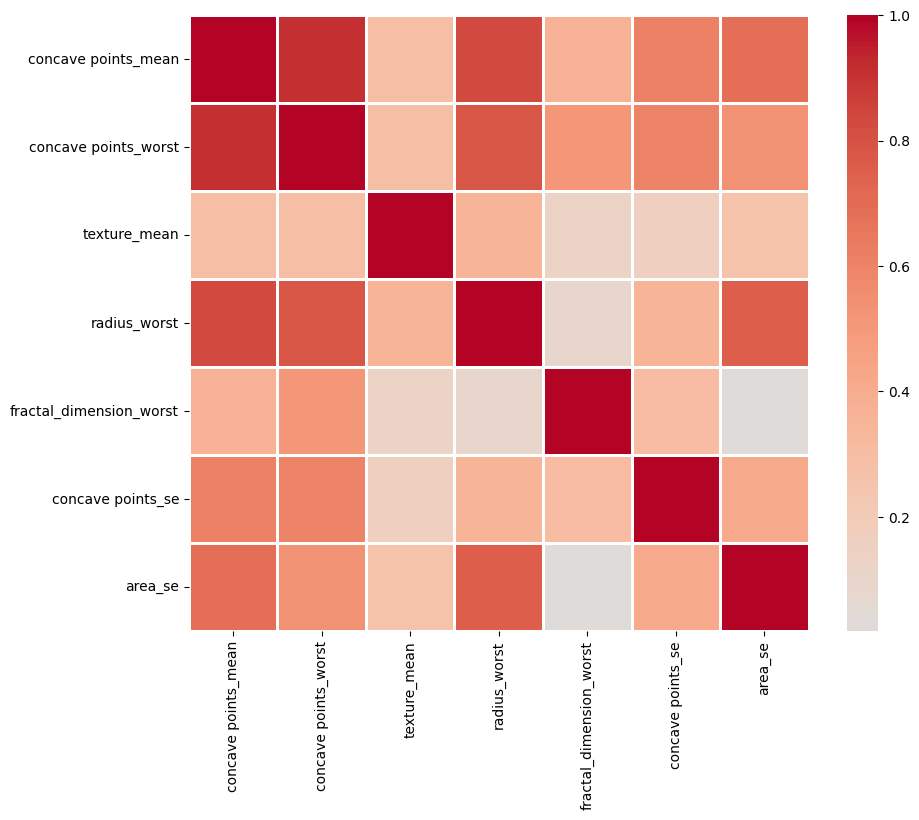

In [37]:
corr = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr,
            cmap='coolwarm',
            center=0,
            # annot=True,
            # fmt=".2f",
            linecolor='white',
            linewidths=1
            )

plt.show()

# Violin plot

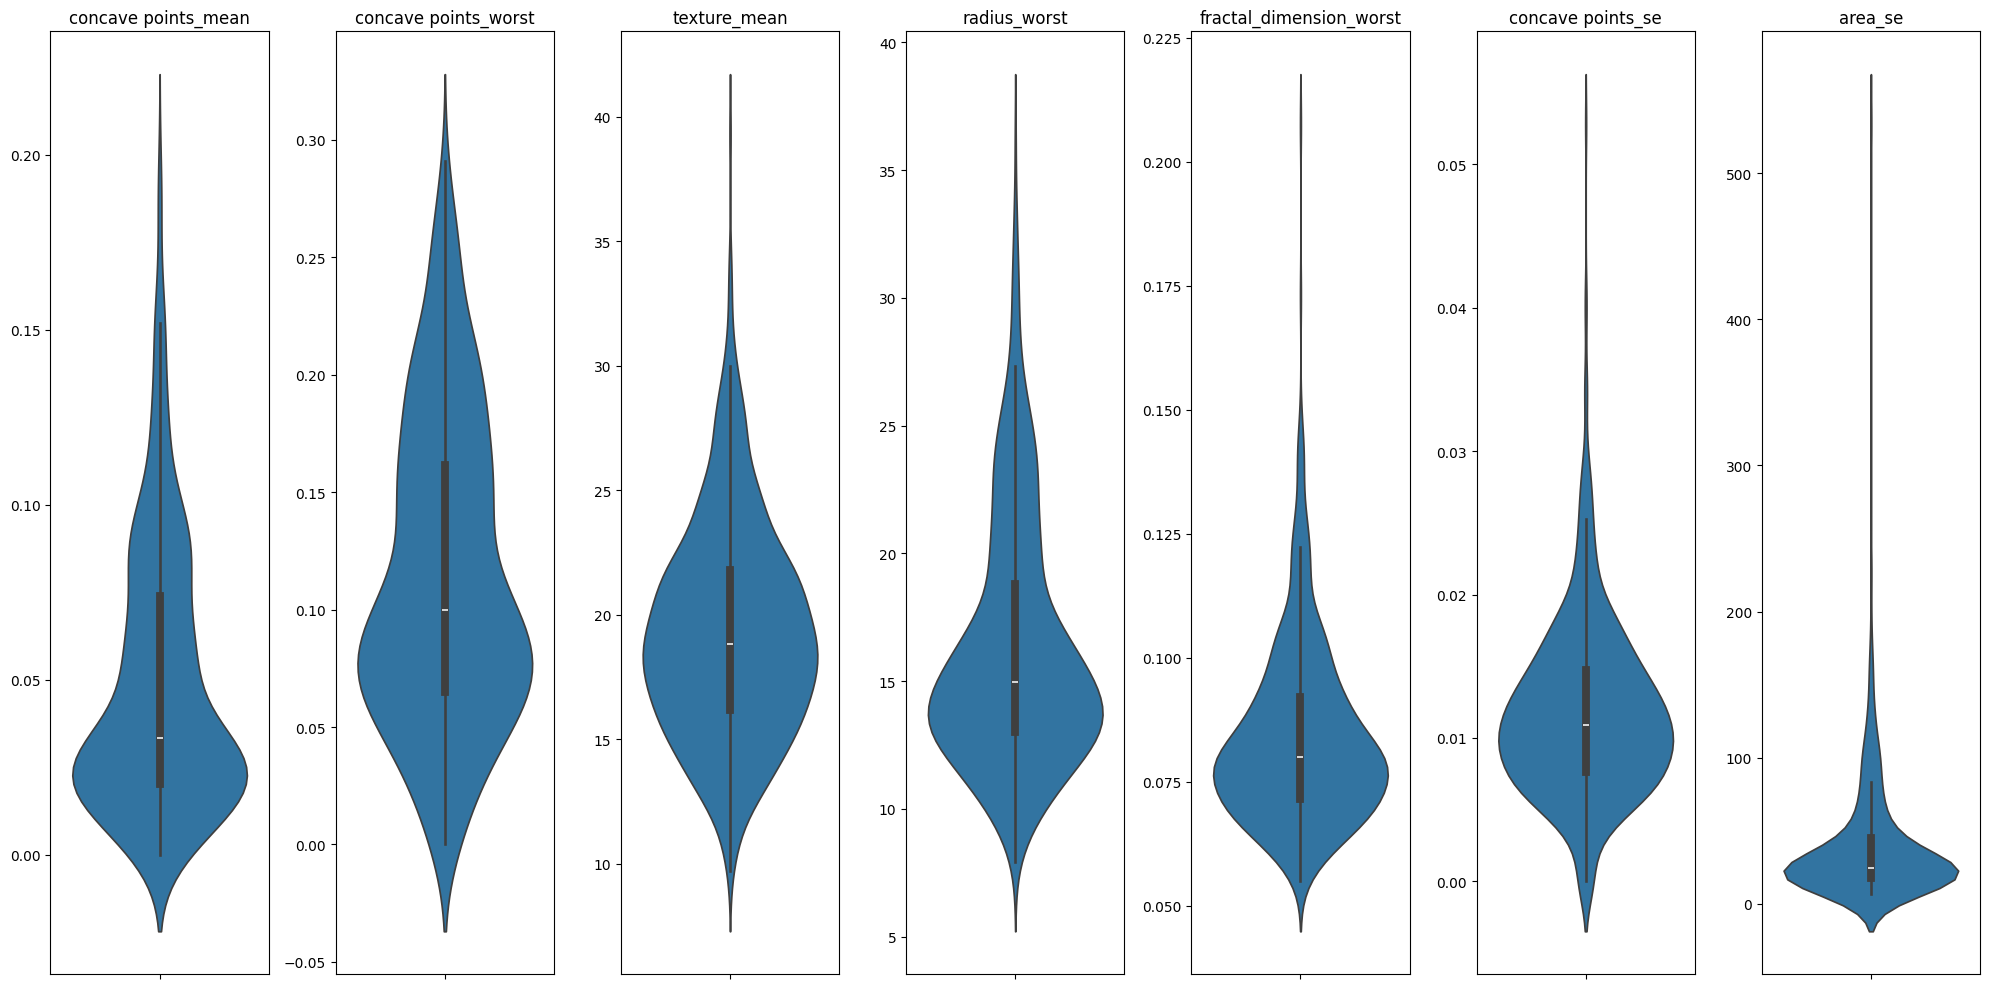

In [38]:
fig, axes = plt.subplots(1, 7, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(X.columns):
    sns.violinplot(y=X[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

# Multiple Logistic Regression

In [39]:
# Fit the model

logistic = skl_lm.LogisticRegression()

logistic.fit(X_train, y_train)

c:\Users\pchaudhary.FFIND\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
color_blue =  "#1a559e"
color_pink =  "#e71d71"

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
concave points_mean,455.0,0.048280,0.038060,0.00000,0.020340,0.03341,0.073895,0.20120
concave points_worst,455.0,0.114182,0.065326,0.00000,0.063930,0.09861,0.161100,0.29100
texture_mean,455.0,19.185033,4.266005,9.71000,16.170000,18.68000,21.585000,39.28000
radius_worst,455.0,16.235103,4.811267,8.67800,13.055000,14.97000,18.410000,36.04000
fractal_dimension_worst,455.0,0.083868,0.017848,0.05504,0.071050,0.08006,0.092070,0.17300
concave points_se,455.0,0.011894,0.006294,0.00000,0.007691,0.01110,0.014645,0.05279
area_se,455.0,40.071299,47.236319,6.80200,18.170000,24.72000,43.725000,542.20000


In [43]:
X_train_w_intercept = sm.add_constant(X_train)
est = sm.Logit(y_train.to_numpy(), X_train_w_intercept).fit()
est.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.080497
         Iterations 11


,coef,std err,z,P>|z|,[0.025,0.975]
const,-28.0000,5.664,-4.943,0.000,-39.102,-16.898
concave points_mean,44.9912,33.898,1.327,0.184,-21.447,111.429
concave points_worst,67.8916,21.027,3.229,0.001,26.679,109.105
texture_mean,0.4423,0.096,4.623,0.000,0.255,0.630
radius_worst,0.5550,0.231,2.399,0.016,0.102,1.008
fractal_dimension_worst,-7.3041,27.432,-0.266,0.790,-61.070,46.462
concave points_se,-281.1870,91.205,-3.083,0.002,-459.945,-102.429
area_se,0.1124,0.032,3.536,0.000,0.050,0.175


## Matrix of confusion for model logistic regression

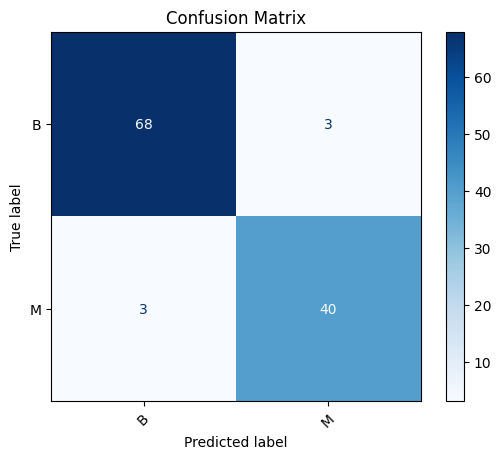

In [44]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['B', 'M']  # Personalizza se necessario
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', values_format='d', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

In [45]:
# Function to evaluate the performance of a classification model
def evaluate_classification_performance(y_test, y_pred):
    """
    Evaluate and print out standard classification metrics.
    """
    # Compute the confusion matrix
    conf_matrix = metrics.confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    
    # Calculate specificity = TN / (TN + FP)
    specificity = tn / (tn + fp)
    
    # Calculate other metrics using scikit-learn
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    
    # FPR = 1 - specificity
    fpr = 1 - specificity
    
    # Print all metrics in a neat format
    print(f"Accuracy:    {accuracy:.2f}")
    print(f"Precision:   {precision:.2f}")
    print(f"Recall:      {recall:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"FPR:         {fpr:.2f}")
    print(f"F1 Score:    {f1:.2f}")
    
    # Optionally return metrics in a dictionary if needed
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'specificity': specificity,
        'fpr': fpr,
        'f1_score': f1
    }

In [46]:
metrics_dict = evaluate_classification_performance(y_test, y_pred)

Accuracy:    0.95
Precision:   0.93
Recall:      0.93
Specificity: 0.96
FPR:         0.04
F1 Score:    0.93


In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



## Roc Curve for model logistic regression

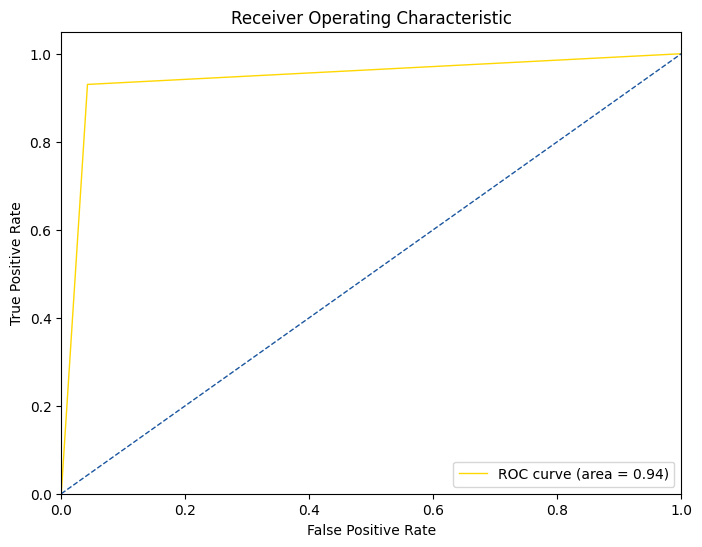

In [48]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='gold', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color=color_blue, lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [49]:
# Calculate the Gini coefficient
gini = 2 * roc_auc - 1
print('Gini coefficient: %.2f' % gini)

Gini coefficient: 0.89


# Random forest

In [50]:
# Select the model
rf_classifier = RandomForestClassifier(n_estimators=600, min_samples_leaf=0.12, random_state=42)

# Fit rf to the training set    
rf_classifier.fit(X_train, y_train) 

# Predict the test set labels
y_pred = rf_classifier.predict(X_test)

# Evaluate the test set RMSE
accuracy = accuracy_score(y_test, y_pred)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(accuracy))

Test set RMSE of rf: 0.94


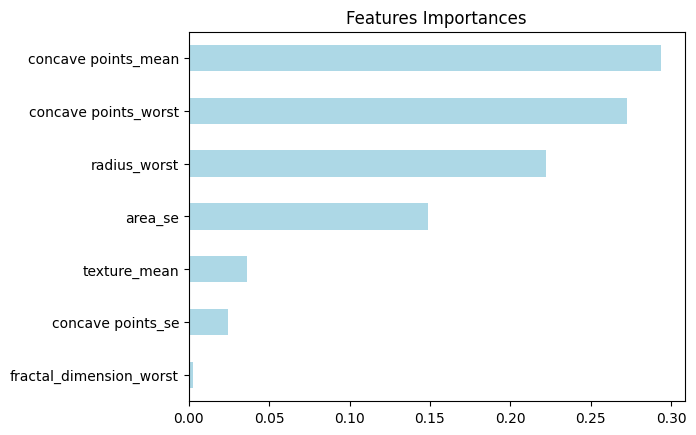

In [51]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf_classifier.feature_importances_, index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightblue')
plt.title('Features Importances')
plt.show()

In [52]:
# The hyperparameters
rf_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 0.12,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 600,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [53]:
# Define the dictionary 'params_rf'
params_rf = {
            'n_estimators' : [100,350,500],
            'max_features' : ['log2','sqrt'],
            'min_samples_leaf' : [2,10,30]            
}

In [54]:
rf_classifier = RandomForestClassifier()

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf_classifier,
                       param_grid=params_rf,
                       scoring='accuracy',
                       cv=3,
                       # verbose=1,
                       n_jobs=-1)

grid_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [2, 10, 30],
                         'n_estimators': [100, 350, 500]},
             scoring='accuracy')

In [55]:
# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print rmse_test
print('Test Accuracy of best model: {:.3f}'.format(accuracy)) 

Test Accuracy of best model: 0.956


In [56]:
def objective(trial):
    # Definition of hypermeters to optimize
    n_estimators = trial.suggest_int('n_estimators', 100, 600)
    max_depth = trial.suggest_int('max_depth', 1, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_float('max_features', 0.1, 1.0)

    # Configuration of model with the hypermeters suggested
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )

    # Calculation of the mid points from cross validation
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1).mean()
    return score

In [57]:
# Creation of study for the optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Restults
print("Migliori parametri trovati:", study.best_params)
print("Miglior score:", study.best_value)

[I 2025-06-02 21:51:37,100] A new study created in memory with name: no-name-9ec6a770-3ea4-4706-8dbe-6371fb5b1691


[I 2025-06-02 21:51:38,314] Trial 0 finished with value: 0.9296793307772743 and parameters: {'n_estimators': 216, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 11, 'max_features': 0.9290423559484792}. Best is trial 0 with value: 0.9296793307772743.
[I 2025-06-02 21:51:40,079] Trial 1 finished with value: 0.9428807947019867 and parameters: {'n_estimators': 508, 'max_depth': 19, 'min_samples_split': 6, 'min_samples_leaf': 10, 'max_features': 0.539135551370877}. Best is trial 1 with value: 0.9428807947019867.
[I 2025-06-02 21:51:41,254] Trial 2 finished with value: 0.9362582781456954 and parameters: {'n_estimators': 345, 'max_depth': 16, 'min_samples_split': 14, 'min_samples_leaf': 13, 'max_features': 0.9741603886791227}. Best is trial 1 with value: 0.9428807947019867.
[I 2025-06-02 21:51:43,077] Trial 3 finished with value: 0.9362728012083189 and parameters: {'n_estimators': 522, 'max_depth': 16, 'min_samples_split': 8, 'min_samples_leaf': 12, 'max_features': 0.571612773090

Migliori parametri trovati: {'n_estimators': 393, 'max_depth': 19, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 0.8946294762264733}
Miglior score: 0.9626466829324968


In [58]:
# Evaluation on the test set with the best model found
best_model = RandomForestClassifier(
    n_estimators=study.best_params['n_estimators'],
    max_depth=study.best_params['max_depth'],
    min_samples_split=study.best_params['min_samples_split'],
    min_samples_leaf=study.best_params['min_samples_leaf'],
    max_features=study.best_params['max_features'],
    random_state=42
)

best_model.fit(X_train, y_train)
print("Accuracy sul test set:", best_model.score(X_test, y_test))

Accuracy sul test set: 0.956140350877193


## Confusion matrix on model random forest

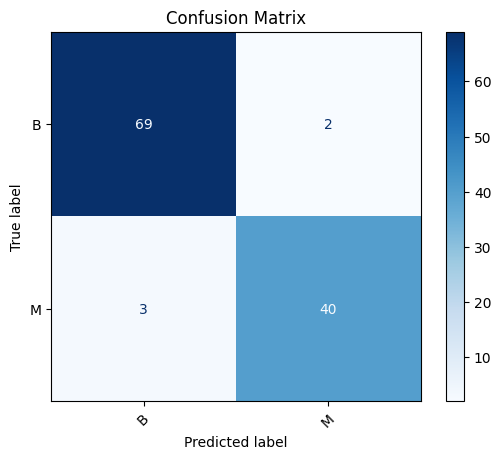

In [59]:
# ✅ Confusion matrix
cm = confusion_matrix(y_test, y_pred)
class_names = ['B', 'M']  # 'Benign', 'Malignant' if needed

# ✅ Display the matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', values_format='d', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

## ROC CURVE on model Random forest

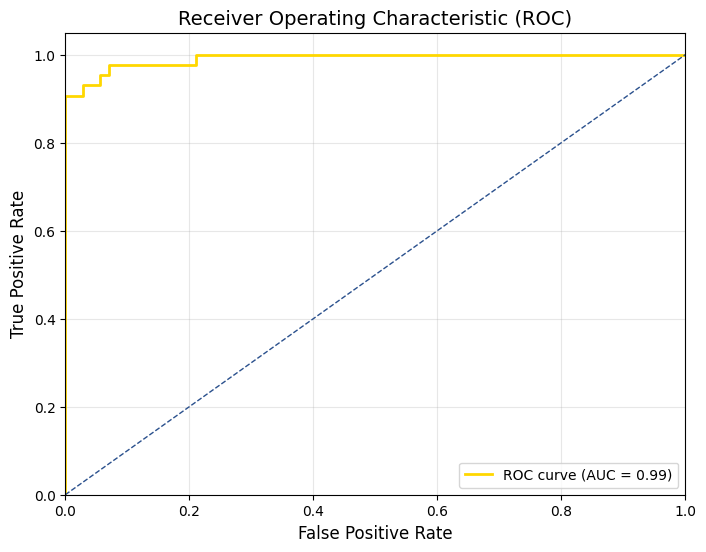

In [ ]:
# Predict probabilities for the positive class (label 1)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

#Optional: Custom color
color_gold = '#FFD700'
color_blue = '#2a508d'

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color=color_gold, lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color=color_blue, lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=14)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

In [62]:
auc_scores = cross_val_score(best_model, X, y, cv=5, scoring='roc_auc')
print("Cross-validated AUC scores:", auc_scores)

Cross-validated AUC scores: [0.97739928 0.97805437 0.9973545  0.99537037 1.        ]


# Neural Networks

In [63]:
# Identification of numerical and categorical columns
numerical_features = X.select_dtypes(include=['float64']).columns.tolist()
categorical_features = ['ocean_proximity'] 

In [64]:
# Pipeline for numerical features (imputation + normalization)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [65]:
# Applicazione delle trasformazioni ai dati
X_train = numerical_transformer.fit_transform(X_train)
X_test = numerical_transformer.transform(X_test)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Numerical Pipeline

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
# 6. Complete preprocessing (all columns are numerical in this example)

preprocessor = ColumnTransformer(
    transformers=[
    ('num', numerical_transformer, X.columns)
    ]
)

 # 7. Apply the preprocessing

X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

# 8. Model building

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_prepared.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 9. Compilation

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 10. Training

history = model.fit(X_train_prepared, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

C:\Users\pchaudhary.FFIND\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.7809 - loss: 0.6094 - val_accuracy: 1.0000 - val_loss: 0.5179
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9011 - loss: 0.5120 - val_accuracy: 0.9783 - val_loss: 0.4403
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9175 - loss: 0.4516 - val_accuracy: 0.9783 - val_loss: 0.3719
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9453 - loss: 0.3678 - val_accuracy: 0.9783 - val_loss: 0.3091
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9559 - loss: 0.3129 - val_accuracy: 0.9565 - val_loss: 0.2514
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9601 - loss: 0.2753 - val_accuracy: 0.9565 - val_loss: 0.2032
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9725 - loss: 0.2255 - val_accuracy: 0.9565 - val_loss: 0.1662
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9710 - loss: 0.1827 - val_accuracy: 0.9565 - v

## Visualization of Learning Progress
This cell displays the trend of the loss function (loss) during training for both the training set and the validation set. This plot helps identify potential issues, such as overfitting.

()

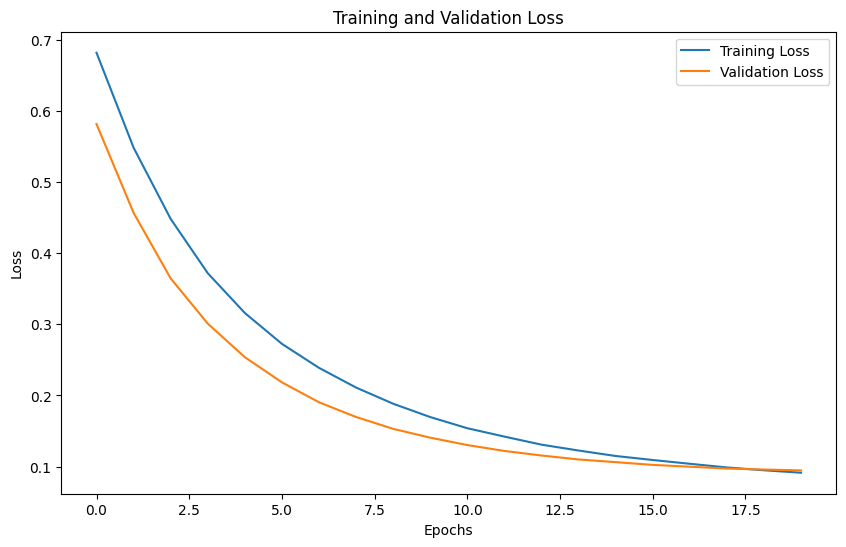

In [ ]:
# Learning curve plot
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show
() 

## Matrix of confusion: Neural Networks

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9738 - loss: 0.0630 

Test Loss: 0.0666
Test Accuracy: 0.9737
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion Matrix:
[[70  1]
 [ 2 41]]


<function matplotlib.pyplot.show(close=None, block=None)>

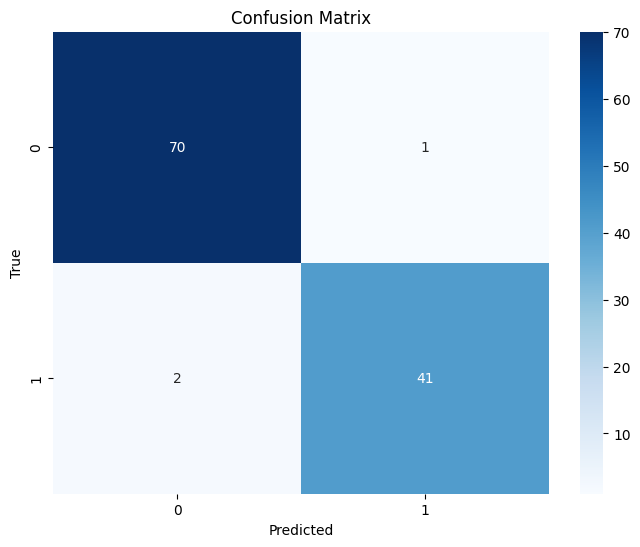

In [67]:
# 11. Evaluation

loss, accuracy = model.evaluate(X_test_prepared, y_test, verbose=1)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}") 
# 12. Prediction and metric
y_pred_proba = model.predict(X_test_prepared)
y_pred = (y_pred_proba > 0.5).astype("int32").ravel()
print("\nClassification Report:")
print(classification_report(y_test, y_pred)) 
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show
plt.show

## ROC curve: Neural Networks


AUC Score: 0.9984


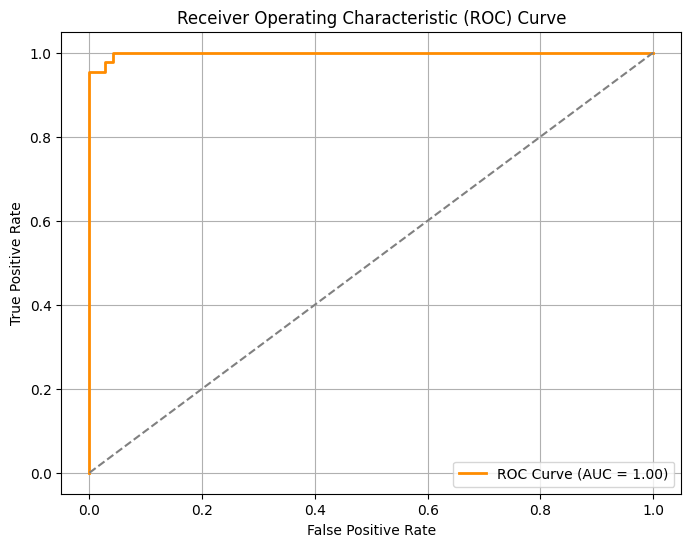

In [68]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nAUC Score: {auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', color='darkorange', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Accuracy of the models

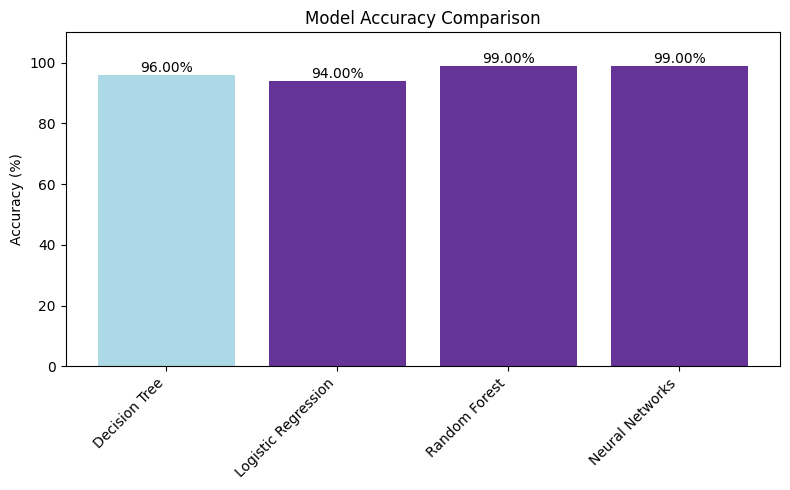

In [75]:
import matplotlib.pyplot as plt

models = ['Decision Tree', 'Logistic Regression', 'Random Forest', 'Neural Networks']
accuracies = [0.96, 0.94, 0.99, 0.99]
accuracies_percent = [acc * 100 for acc in accuracies]

plt.figure(figsize=(8,5))
bars = plt.bar(models, accuracies_percent, color=['lightblue', 'rebeccapurple', 'rebeccapurple', 'rebeccapurple'])

for bar, acc in zip(bars, accuracies_percent):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{acc:.2f}%', ha='center')

plt.ylabel('Accuracy (%)')
plt.ylim(0, 110)
plt.title('Model Accuracy Comparison')

# Rotate x-axis labels diagonally
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()